<a href="https://colab.research.google.com/github/Al3jandraMtz/P3_Riesgo_Relativo/blob/main/P3_Hito3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prueba 1.-** **Regresión** **Logistica** ⏰
[Ejercicio](https://github.com/gonzalezgouveia/clases-youtube/blob/main/diabetes-logistic/diabetes.ipynb)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos en DataFrames desde los archivos subidos
df = pd.read_csv('/content/Data_Consolidado.csv')

In [ ]:
df.head()


,user_id,default_flag,age,generational_group,sex,last_month_salary,number_dependents,real_estate_loan_type,others_loan_type,total_loan_type,...,using_lines_not_secured_personal_assets,Incumplimiento_unsec_line,delay_30_59_90,segmentacion_delay,age_dummy,last_month_salary_dummy,delay_30_59_90_dummy,using_lines_not_secured_personal_assets_dummy,risk_score,payment_classification
0,197,0,41,Millenials,M,8350.0,0,1.0,10.0,11.0,...,0.215235,Bajo Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador
1,4826,0,41,Millenials,F,12400.0,0,1.0,9.0,10.0,...,0.065084,Bajo Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador
2,5506,0,41,Millenials,F,4525.0,0,0.0,6.0,6.0,...,0.342415,Medio Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador
3,6038,0,41,Millenials,F,10333.0,0,1.0,3.0,4.0,...,0.001800,Bajo Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador
4,7463,0,41,Millenials,M,4100.0,0,1.0,4.0,5.0,...,0.075609,Bajo Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador


In [ ]:
#PRUEBA 1

#Convertir a variables númericas
# Verificar las categorías únicas en la columna
print(df['generational_group'].unique())

# Diccionario de mapeo
category_mapping = {
    'Baby Boomer': 0,
    'Generation X': 1,
    'Millennial': 2,
    'Generation Z': 3
}

# Aplicar el mapeo a la columna 'generational_group', Usar fillna() para manejar categorías no mapeadas (si hay alguna)
df['generational_group_numeric'] = df['generational_group'].map(category_mapping)

# Si quieres asignar un valor predeterminado para categorías no mapeadas
df['generational_group_numeric'] = df['generational_group_numeric'].fillna(-1)

from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el LabelEncoder a la columna 'generational_group'
df['generational_group_numeric'] = label_encoder.fit_transform(df['generational_group'])

# Ver las primeras filas para comprobar
df.head()



['Millenials' 'Generacion X' 'Baby Boomers' 'Generacion Z']


,user_id,default_flag,age,generational_group,sex,last_month_salary,number_dependents,real_estate_loan_type,others_loan_type,total_loan_type,...,Incumplimiento_unsec_line,delay_30_59_90,segmentacion_delay,age_dummy,last_month_salary_dummy,delay_30_59_90_dummy,using_lines_not_secured_personal_assets_dummy,risk_score,payment_classification,generational_group_numeric
0,197,0,41,Millenials,M,8350.0,0,1.0,10.0,11.0,...,Bajo Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador,3
1,4826,0,41,Millenials,F,12400.0,0,1.0,9.0,10.0,...,Bajo Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador,3
2,5506,0,41,Millenials,F,4525.0,0,0.0,6.0,6.0,...,Medio Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador,3
3,6038,0,41,Millenials,F,10333.0,0,1.0,3.0,4.0,...,Bajo Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador,3
4,7463,0,41,Millenials,M,4100.0,0,1.0,4.0,5.0,...,Bajo Riesgo,0,Ningún Retraso,0,0,0,0,0.0,Buen pagador,3


In [ ]:
#1.- Visualizacion de variables a estudiar
df[['default_flag','age']].head()

,default_flag,age
0,0,41
1,0,41
2,0,41
3,0,41
4,0,41


<Axes: xlabel='default_flag', ylabel='age'>

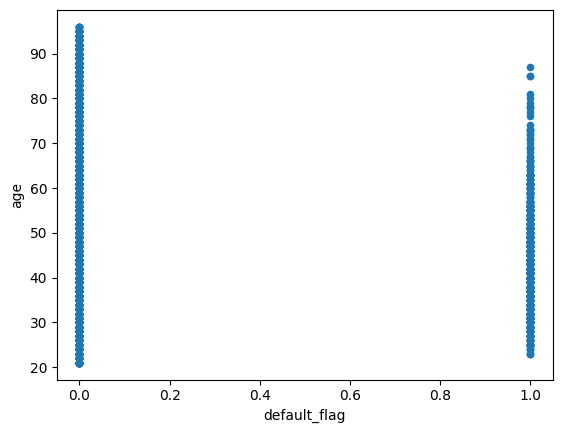

In [ ]:
#Explorar variables
df[['default_flag','age']].plot.scatter(x='default_flag',y='age')

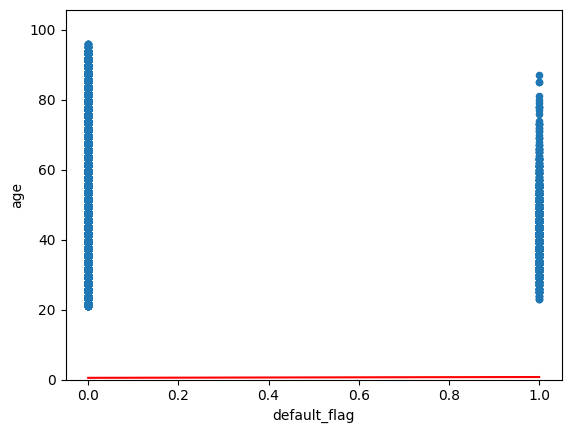

-0.08151216391580475

In [ ]:
#2.2 Función Logistica
# Definir w (pendiente) y b (intercepto)
w = 1
b = 0

# puntos de la recta
x = np.linspace(0,df['default_flag'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
df.plot.scatter(x='default_flag',y='age')
plt.plot(x, y, '-r')
plt.ylim(0,df['age'].max()*1.1)
# plt.grid()
plt.show()

#2.3
# calculo de las predicciones
df['sigmoid'] = 1/(1+np.exp(-(df['default_flag']*w+b)))

# calculo de la funcion de error
df['loss_xi'] = -df['age']*np.log(df['sigmoid'])-(1-df['age'])*np.log(1-df['sigmoid'])
cost_j = df['loss_xi'].mean()
cost_j

In [ ]:
#2.3 Optimización de parámetros

df = pd.read_csv('/content/Data_Consolidado.csv')

# calculo de las predicciones
df['sigmoid'] = 1/(1+np.exp(-(df['default_flag']*w+b)))

# calculo de la funcion de error
df['loss_xi'] = -df['age']*np.log(df['sigmoid'])-(1-df['age'])*np.log(1-df['sigmoid'])
cost_j = df['loss_xi'].mean()
cost_j


-0.08151216391580475

In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

#Dataframe para w y b
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array,
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)
df




,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [ ]:
import numpy as np
import pandas as pd

# Supongamos que tienes un DataFrame 'df' con las columnas 'default_flag' y 'age'
# Creamos un DataFrame 'df_wb' con los valores de 'w' y 'b'
w_values = np.linspace(0.05, 0.15, 11)
b_values = np.linspace(-4, -3, 11)
df_wb = pd.DataFrame(np.array(np.meshgrid(w_values, b_values)).T.reshape(-1, 2), columns=['w', 'b'])

# Definimos la función para calcular el error
def sum_error_df(row):
    sigmoid = 1 / (1 + np.exp(-(df['default_flag'] * row['w'] + row['b'])))
    loss_xi = -df['age'] * np.log(sigmoid) - (1 - df['age']) * np.log(1 - sigmoid)
    return loss_xi.mean()

# Supongamos que tienes un DataFrame 'df' con las columnas 'default_flag' y 'age'
df = pd.DataFrame({
    'default_flag': np.random.randint(0, 2, 100),
    'age': np.random.randint(20, 70, 100)
})

# Aplicar la función a cada fila del DataFrame df_wb
df_wb['error'] = df_wb.apply(sum_error_df, axis=1)

# Ordenar por la columna 'error' y mostrar las primeras filas
print(df_wb.sort_values(by=['error']).head())

# Crear un DataFrame pivotado
df_3d = df_wb.pivot(index='w', columns='b', values='error')

# Imprimir las primeras filas del DataFrame pivotado
print(df_3d.head())


        w    b       error
120  0.15 -3.0  124.480181
109  0.14 -3.0  124.678725
98   0.13 -3.0  124.877272
87   0.12 -3.0  125.075821
76   0.11 -3.0  125.274372
b           -4.0        -3.9        -3.8        -3.7        -3.6        -3.5  \
w                                                                              
0.05  168.904583  164.659518  160.414651  156.170004  151.925598  147.681456   
0.06  168.705872  164.460816  160.215960  155.971324  151.726929  147.482802   
0.07  168.507162  164.262115  160.017269  155.772644  151.528263  147.284148   
0.08  168.308453  164.063416  159.818580  155.573966  151.329597  147.085496   
0.09  168.109745  163.864717  159.619892  155.375290  151.130933  146.886846   

b           -3.4        -3.3        -3.2        -3.1        -3.0  
w                                                                 
0.05  143.437606  139.194076  134.950896  130.708102  126.465729  
0.06  143.238966  138.995452  134.752290  130.509515  126.267164  
0.07  143

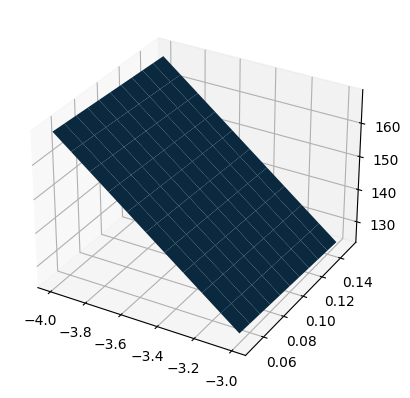

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

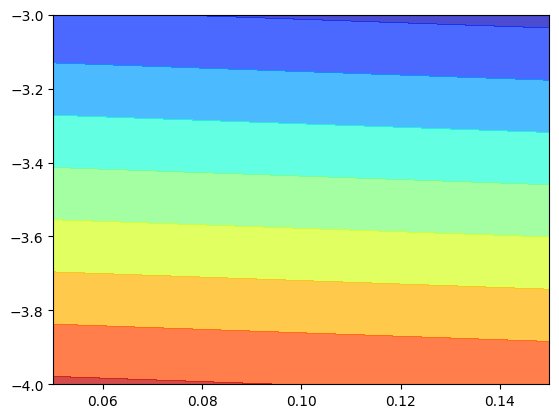

In [ ]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [ ]:
def delta_j_w(w, b):
    df['sigmoid'] = 1/(1+np.exp(-(df['default_flag']*w+b)))
    df['partial_loss'] = (df['sigmoid']-df['age'])*df['default_flag']
    derivative = df['partial_loss'].mean()
    return(derivative)

def delta_j_b(w, b):
    df['sigmoid'] = 1/(1+np.exp(-(df['default_flag']*w+b)))
    df['partial_loss'] = (df['sigmoid']-df['age'])
    derivative = df['partial_loss'].mean()
    return(derivative)

w_0 = 0.05
b_0 = -4.00

alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

0.06987112124788959 0.24515885566096873


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Suponiendo que quieres predecir si la edad es mayor o menor a un umbral
Y_train_binary = np.where(df['age'] > 50, 1, 0)

# Definiendo input y output
X_train = np.array(df['default_flag']).reshape((-1, 1))

# Creando el modelo
model = LogisticRegression()
model.fit(X_train, Y_train_binary)

# Imprimiendo parámetros
print(f"intercepto (b): {model.intercept_[0]}")
print(f"pendiente (w): {model.coef_[0][0]}")


intercepto (b): -0.7508465400988974
pendiente (w): -0.006228501162897477


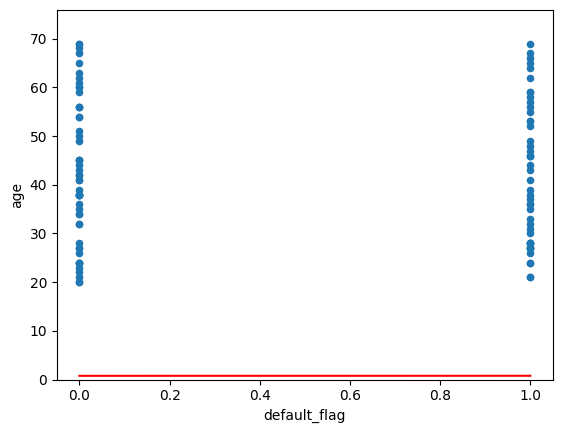

-52.201217330397604

In [ ]:
#2.2 Función Logistica
# Definir w (pendiente) y b (intercepto)
w = 0.05078
b = 1.241

# puntos de la recta
x = np.linspace(0,df['default_flag'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
df.plot.scatter(x='default_flag',y='age')
plt.plot(x, y, '-r')
plt.ylim(0,df['age'].max()*1.1)
# plt.grid()
plt.show()

#2.3
# calculo de las predicciones
df['sigmoid'] = 1/(1+np.exp(-(df['default_flag']*w+b)))

# calculo de la funcion de error
df['loss_xi'] = -df['age']*np.log(df['sigmoid'])-(1-df['age'])*np.log(1-df['sigmoid'])
cost_j = df['loss_xi'].mean()
cost_j

**Prueba 2.-** **Regresión** **Logistica** ⏰
[Ejercicio](https://medium.com/@hector.daniel.mejia.hernandez/eda-y-regresi%C3%B3n-log%C3%ADstica-en-python-1b618ae7482c)


In [ ]:
df = pd.read_csv('/content/Data_Consolidado.csv')

df.describe()

,user_id,default_flag,age,last_month_salary,number_dependents,real_estate_loan_type,others_loan_type,total_loan_type,debt_ratio,using_lines_not_secured_personal_assets,delay_30_59_90,age_dummy,last_month_salary_dummy,delay_30_59_90_dummy,using_lines_not_secured_personal_assets_dummy,risk_score
count,35923.000000,35923.000000,35923.000000,35923.000000,35923.000000,35560.000000,35560.000000,35560.000000,35923.000000,35923.000000,35923.000000,35923.000000,35923.000000,35923.000000,35923.000000,35923.000000
mean,18001.928959,0.017593,52.435682,6241.112713,0.738969,1.027925,7.555118,8.583043,352.307924,5.817704,0.404281,0.229686,0.644991,0.201431,0.249979,0.360360
std,10392.520791,0.131469,14.758279,5764.151265,1.110950,1.119398,4.757974,5.127593,2013.727497,223.646337,1.115830,0.420637,0.478523,0.401075,0.433007,0.235043
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9005.500000,0.000000,41.000000,3878.000000,0.000000,0.000000,4.000000,5.000000,0.177165,0.029466,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
50%,18000.000000,0.000000,52.000000,5000.000000,0.000000,1.000000,7.000000,8.000000,0.366547,0.149086,0.000000,0.000000,1.000000,0.000000,0.000000,0.400000
75%,27003.500000,0.000000,63.000000,7423.500000,1.000000,2.000000,10.000000,11.000000,0.875279,0.546682,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000
max,36000.000000,1.000000,96.000000,428250.000000,13.000000,25.000000,56.000000,57.000000,307001.000000,22000.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-34-40434fab6d22>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Buen pagador', 'Mal pagador'])


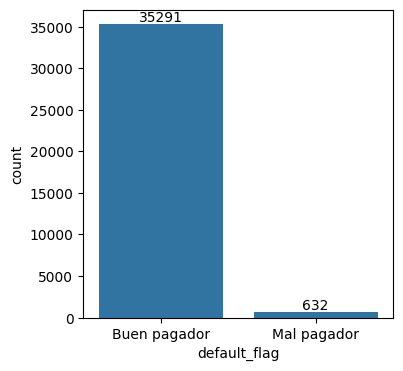

In [ ]:
#Revisar distribuicion
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(4,4))

ax1 = sb.countplot(x="default_flag", data=df)
for label in ax1.containers:
    ax1.bar_label(label)
ax1.set_xticklabels(['Buen pagador', 'Mal pagador'])

plt.show()


log_delay          0
log_using_lines    0
log_debt_ratio     0
dtype: int64


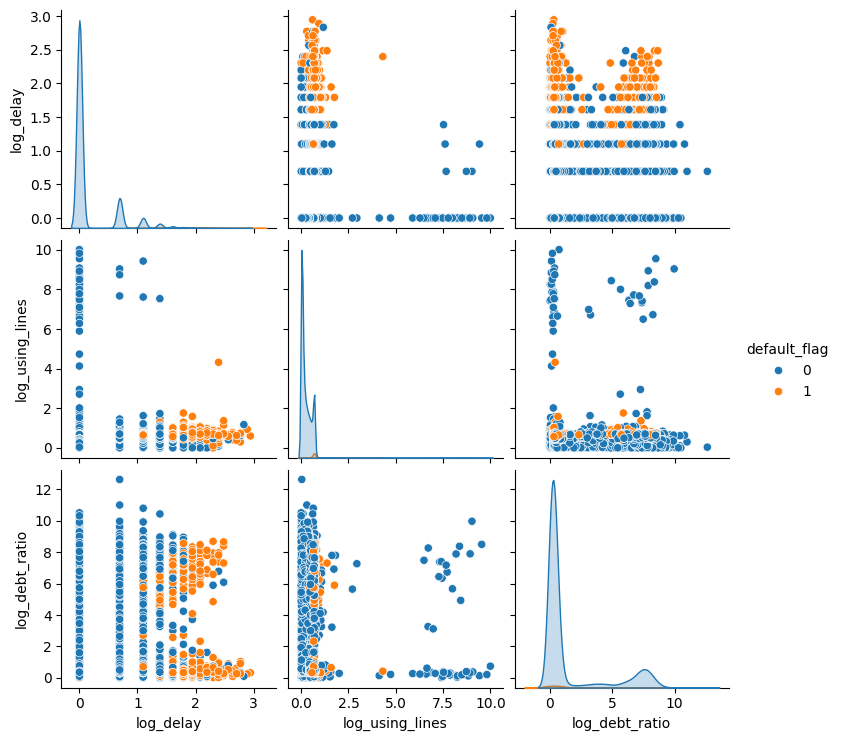

In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Transformación logarítmica de las variables originales
df['log_delay'] = np.log10(df['delay_30_59_90'] + 1)  # Añadir 1 para evitar log(0)
df['log_using_lines'] = np.log10(df['using_lines_not_secured_personal_assets'] + 1)
df['log_debt_ratio'] = np.log10(df['debt_ratio'] + 1)

df['log_delay'] = np.log1p(df['delay_30_59_90'])
df['log_using_lines'] = np.log1p(df['using_lines_not_secured_personal_assets'])
df['log_debt_ratio'] = np.log1p(df['debt_ratio'])

print(df[['log_delay', 'log_using_lines', 'log_debt_ratio']].isnull().sum())


# Realizar el pairplot con las variables transformadas
sb.pairplot(data=df[['log_delay', 'log_using_lines', 'log_debt_ratio', 'default_flag']], hue='default_flag')
plt.show()



Separación de clases:



*  Los puntos naranjas (que representan default_flag = 1) y los puntos azules (que representan default_flag = 0) están mezclados en varias partes del gráfico, lo que sugiere que las variables transformadas no separan perfectamente las clases. Esto es especialmente visible en las combinaciones de log_using_lines y log_delay, donde los puntos naranjas están dispersos en varios rangos de las variables.

Conclusión:



*   El pairplot sugiere que, si bien hay algunas tendencias y relaciones, las variables transformadas no separan claramente las dos clases (default y no-default) por sí solas. Esto indica que tal vez se necesiten más características, combinaciones no lineales, o diferentes transformaciones para mejorar la capacidad predictiva de un modelo basado en estos datos.



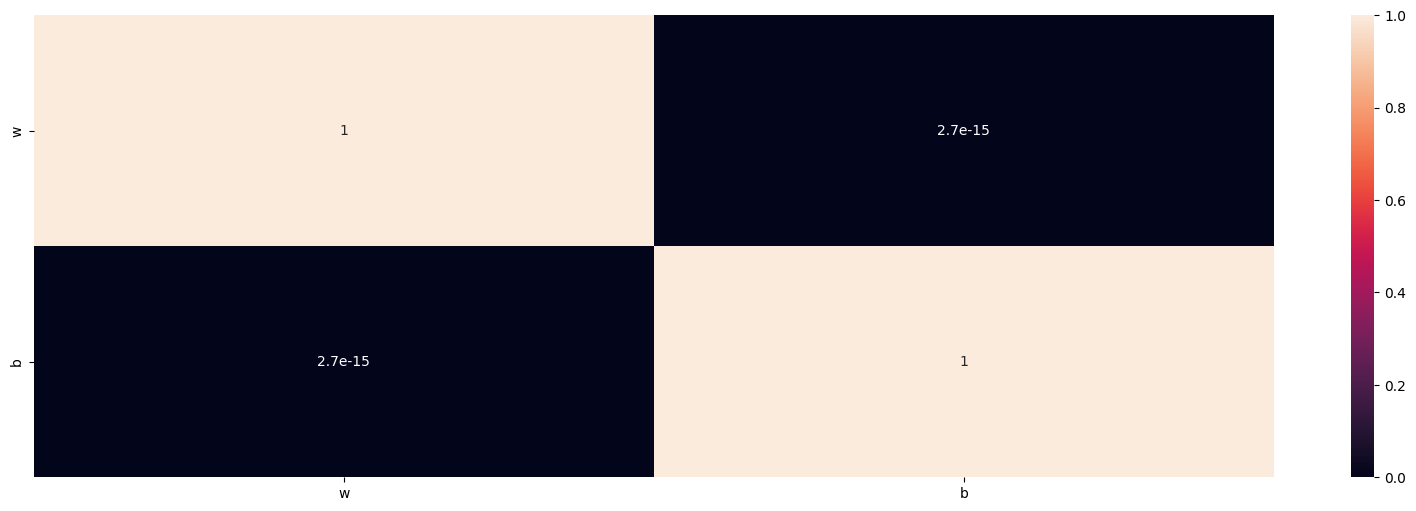

In [ ]:
#   Mapa de calor que indica las correlaciones
import seaborn as sb
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 6))

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Crear el mapa de calor
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='rocket')

# Mostrar la gráfica
plt.show()



In [ ]:
import numpy as np
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Verificar y limpiar los datos
df = df[['delay_30_59_90', 'using_lines_not_secured_personal_assets', 'debt_ratio', 'default_flag']].dropna()

# Convertir las columnas especificadas a un array de NumPy
X = np.asarray(df[['delay_30_59_90', 'using_lines_not_secured_personal_assets', 'debt_ratio', 'default_flag']])

# Mostrar los primeros 5 registros del array
print(X[0:5])



[[0.         0.21523505 0.16548916 0.        ]
 [0.         0.06508413 0.18482381 0.        ]
 [0.         0.342415   0.07247017 0.        ]
 [0.         0.00179996 0.28982001 0.        ]
 [0.         0.07560925 0.32845647 0.        ]]


In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Convertir las columnas especificadas a un array de NumPy
X = np.asarray(df[['delay_30_59_90', 'using_lines_not_secured_personal_assets', 'debt_ratio']])

# Estandarizar las características para que tengan media 0 y varianza 1
X = preprocessing.StandardScaler().fit(X).transform(X)

# Mostrar los primeros 5 registros del array estandarizado
print(X[0:5])

# Crear la variable dependiente (target)
y = np.asarray(df['default_flag'])

# Verificar y limpiar los datos de la variable dependiente
y = np.where(np.isfinite(y), y, np.nan)
y = y[~np.isnan(y)]

# Mostrar los primeros 5 valores de la variable dependiente
print(y[0:5])

# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# Crear y ajustar el modelo de regresión logística
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

# Mostrar los detalles del modelo
print(LR)



[[-0.36231961 -0.02505092 -0.17487338]
 [-0.36231961 -0.02572231 -0.17486378]
 [-0.36231961 -0.02448225 -0.17491957]
 [-0.36231961 -0.02600528 -0.17481164]
 [-0.36231961 -0.02567525 -0.17479245]]
[0. 0. 0. 0. 0.]
Train set: (28738, 3) (28738,)
Test set: (7185, 3) (7185,)
LogisticRegression(C=0.01, solver='liblinear')


In [ ]:
# Predecir las probabilidades de las clases en el conjunto de prueba
yhat_prob = LR.predict_proba(X_test)
yhat_prob


array([[0.98680167, 0.01319833],
       [0.9868015 , 0.0131985 ],
       [0.98680195, 0.01319805],
       ...,
       [0.98680157, 0.01319843],
       [0.98680153, 0.01319847],
       [0.98680142, 0.01319858]])

In [ ]:
# Predecir las clases (0 o 1) en el conjunto de prueba
yhat = LR.predict(X_test)
print(yhat)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
#Peso de las variables independientes
import pandas as pd

# Definir la función para calcular la importancia de las características
def get_feature_importance(LR, feature_names):
    feature_importance = (
        pd.DataFrame(
            {
                'Variable': feature_names,
                'Coeficiente': LR.coef_[0]
            }
        )
        .round(decimals=2)
        .sort_values('Coeficiente', ascending=False)
        .style.bar(color=['red', 'green'], align='zero')
    )
    return feature_importance

# Llamar a la función pasando el modelo entrenado y los nombres de las características
get_feature_importance(LR, ['delay_30_59_90', 'using_lines_not_secured_personal_assets', 'debt_ratio'])


,Variable,Coeficiente
0,delay_30_59_90,0.890000
1,using_lines_not_secured_personal_assets,-0.010000
2,debt_ratio,-0.070000


Prueba 3 **Regresion Logistica**

Coeficiente w: 0.5725682105295079
Intercepto b: -1.251581001972218
Precisión: 0.71
Confusion Matrix:
[[25112 10179]
 [  315   317]]


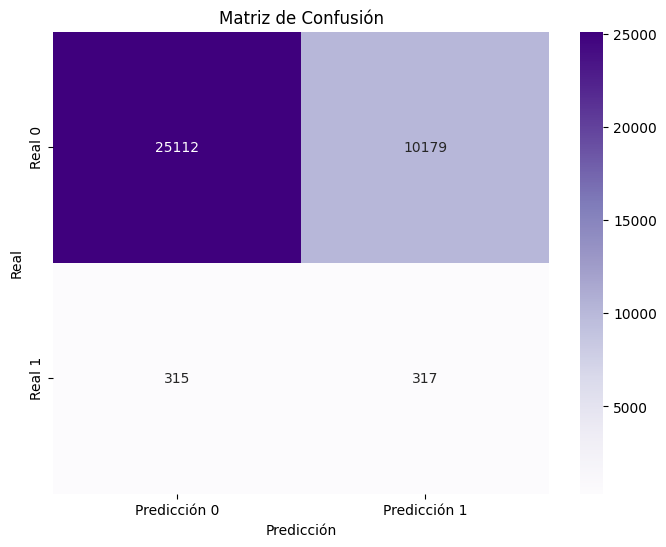

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     35291
           1       0.03      0.50      0.06       632

    accuracy                           0.71     35923
   macro avg       0.51      0.61      0.44     35923
weighted avg       0.97      0.71      0.81     35923



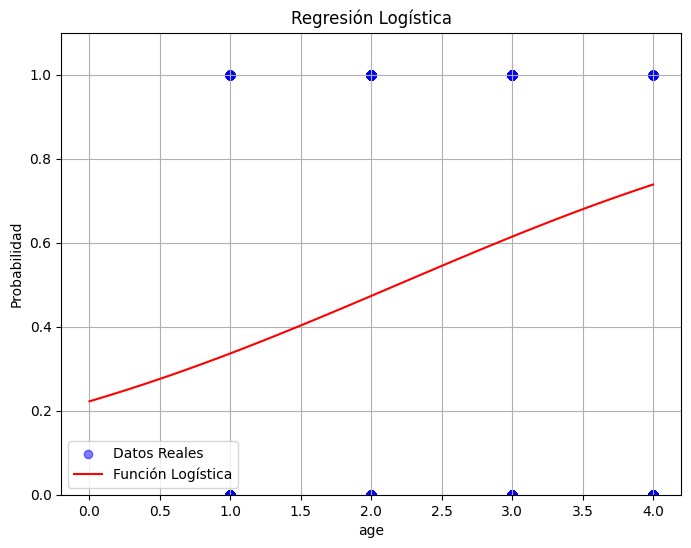

In [74]:
#PRUEBA 1 VALORES generational_group
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Convertir la variable categórica 'generational_group' en valores numéricos
df['var_temp'] = df['generational_group'].map({'Baby Boomers': 1, 'Generacion X': 2,  'Millenials': 3,  'Generacion Z': 4})

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['var_temp']].values  # Variable predictora
y = df['default_flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]
print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)


# Puntos de la recta para graficar la función logística
x = np.linspace(0, df['var_temp'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='Blue', label='Datos Reales', alpha=0.5)
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('generational_group')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()



Coeficiente w: -0.04363241559864714
Intercepto b: 2.1138378472295454
Precisión: 0.59
Confusion Matrix:
[[20875 14416]
 [  225   407]]


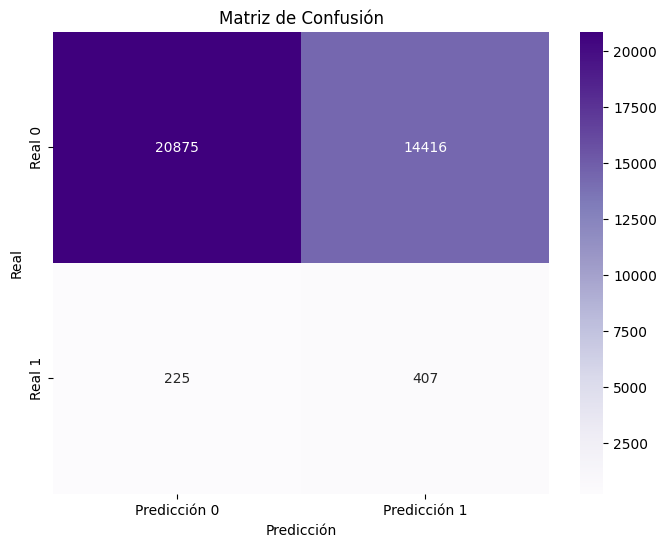

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     35291
           1       0.03      0.64      0.05       632

    accuracy                           0.59     35923
   macro avg       0.51      0.62      0.40     35923
weighted avg       0.97      0.59      0.73     35923



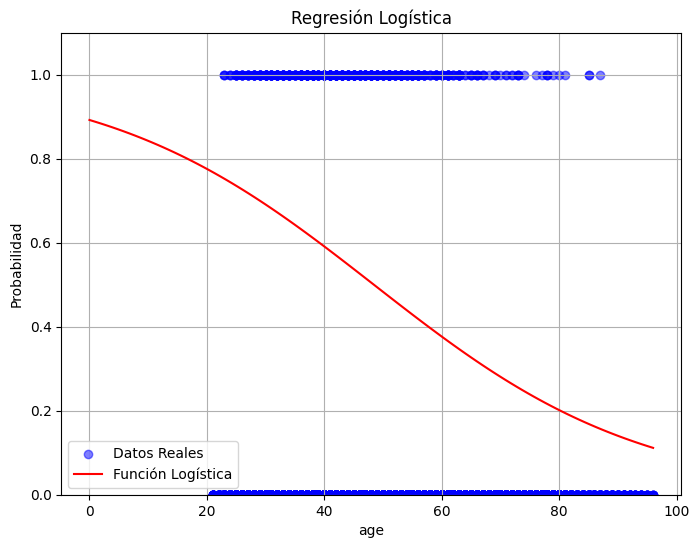

In [72]:
#REGRESION LOGISTICA AGE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['age']]  # Variable predictora
y = df['default_flag']  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]
print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, zero_division=1)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)


# Puntos de la recta para graficar la función logística
x = np.linspace(0, df['age'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Reales', alpha=0.5)
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('age')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

Coeficiente w: 0.2139838766198133
Intercepto b: -0.18789447834082615
Precisión: 0.61
Confusion Matrix:
[[21485 13806]
 [  309   323]]


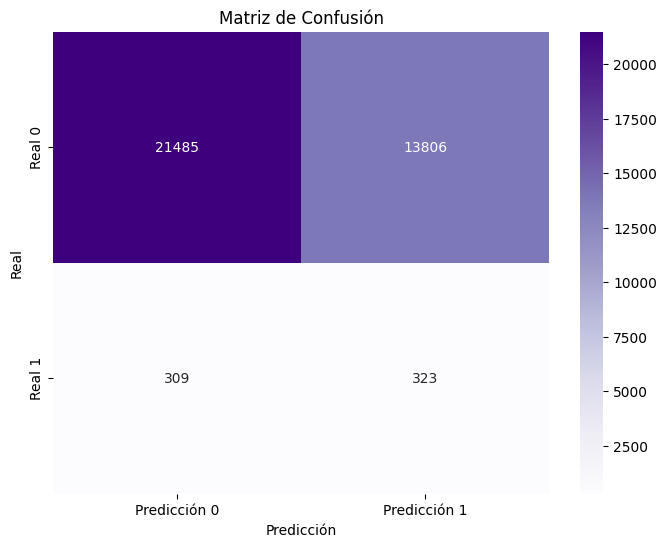

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.61      0.75     35291
           1       0.02      0.51      0.04       632

    accuracy                           0.61     35923
   macro avg       0.50      0.56      0.40     35923
weighted avg       0.97      0.61      0.74     35923



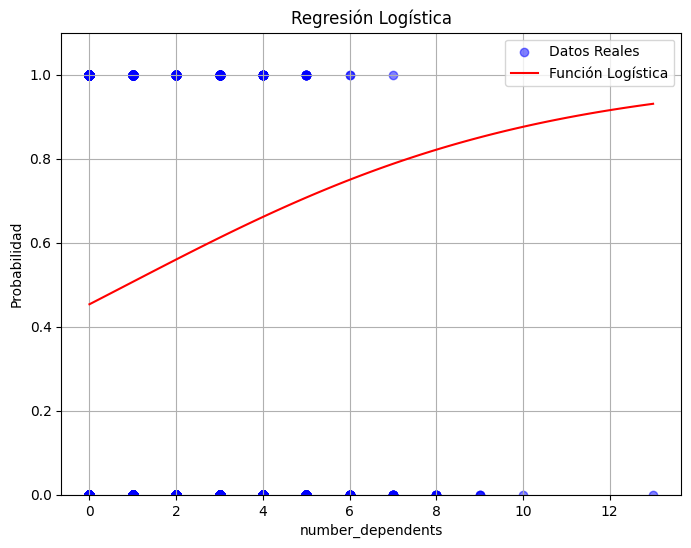

In [75]:
#REGRESION LOGISTICA number_dependents
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['number_dependents']]  # Variable predictora
y = df['default_flag']  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]
print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, zero_division=1)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= 'Purples', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)


# Puntos de la recta para graficar la función logística
x = np.linspace(0, df['number_dependents'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Reales', alpha=0.5)
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('number_dependents')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

Coeficiente w: 0.17849284880701174
Intercepto b: -0.35100805462850493
Accuracy: 0.42
Precision: 0.02
Recall: 0.65
F1 Score: 0.04
Confusion Matrix:
[[14767 20524]
 [  219   413]]


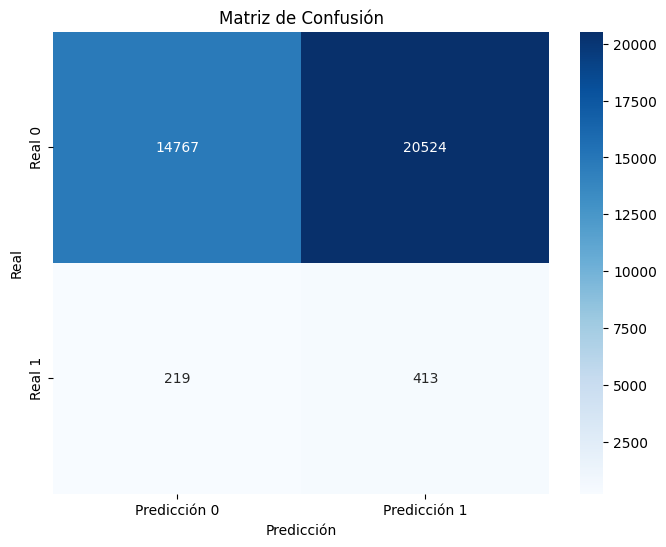

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.42      0.59     35291
           1       0.02      0.65      0.04       632

    accuracy                           0.42     35923
   macro avg       0.50      0.54      0.31     35923
weighted avg       0.97      0.42      0.58     35923



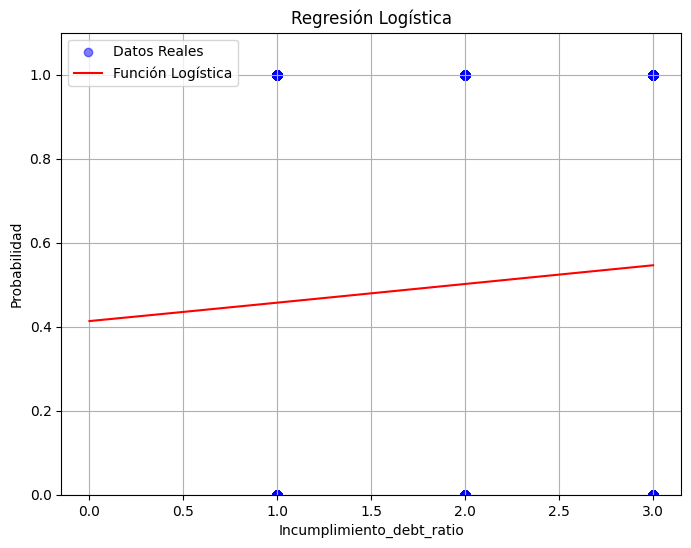

In [87]:
#REGRSION LINEAL INCUMPLEMIENTO DEBT_RATIO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Convertir la variable categórica 'Incumplimiento_debt_ratio' en valores numéricos
df['var_temp'] = df['Incumplimiento_debt_ratio'].map({'Bajo Riesgo': 1, 'Medio Riesgo': 2, 'Alto Riesgo': 3})

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['var_temp']].values  # Convertir a un array 2D
y = df['default_flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]
print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, zero_division=1)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Imprimir las métricas de rendimiento
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)

# Puntos de la recta para graficar la función logística
x = np.linspace(0, df['var_temp'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Reales', alpha=0.5)
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('Incumplimiento_debt_ratio')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()


Coeficiente w: 2.374383977438002
Intercepto b: -5.67796117577411
Accuracy: 0.79
Precision: 0.07
Recall: 0.92
F1 Score: 0.13
Confusion Matrix:
[[27628  7663]
 [   53   579]]


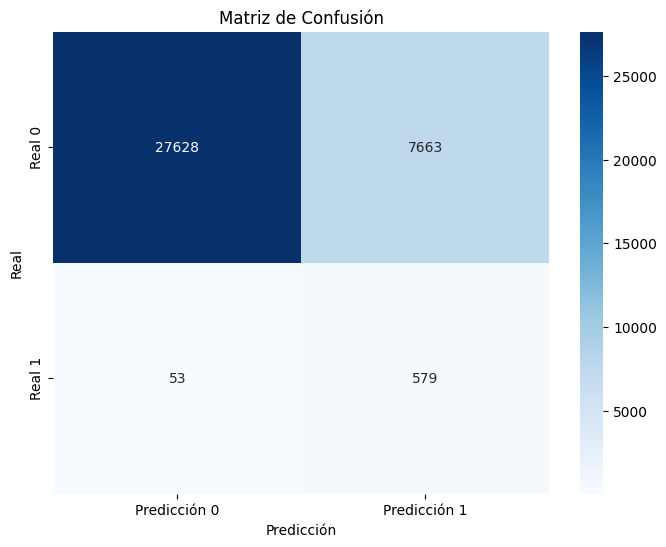

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     35291
           1       0.07      0.92      0.13       632

    accuracy                           0.79     35923
   macro avg       0.53      0.85      0.50     35923
weighted avg       0.98      0.79      0.86     35923



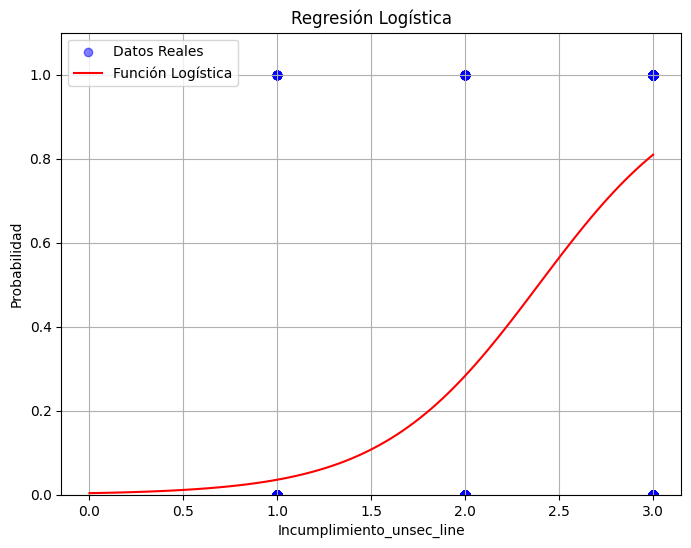

In [88]:
#REGRSION LINEAL INCUMPLEMIENTO using lines
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Convertir la variable categórica 'Incumplimiento_using_lines' en valores numéricos
df['var_temp'] = df['Incumplimiento_unsec_line'].map({'Bajo Riesgo': 1, 'Medio Riesgo': 2, 'Alto Riesgo': 3})

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['var_temp']].values  # Convertir a un array 2D
y = df['default_flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]
print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, zero_division=1)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Imprimir las métricas de rendimiento
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)

# Puntos de la recta para graficar la función logística
x = np.linspace(0, df['var_temp'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Reales', alpha=0.5)
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('Incumplimiento_unsec_line')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

Coeficiente w: 9.057360503330695
Intercepto b: -7.3846035742852765
Precisión: 0.82
Confusion Matrix:
[[28687  6604]
 [    0   632]]


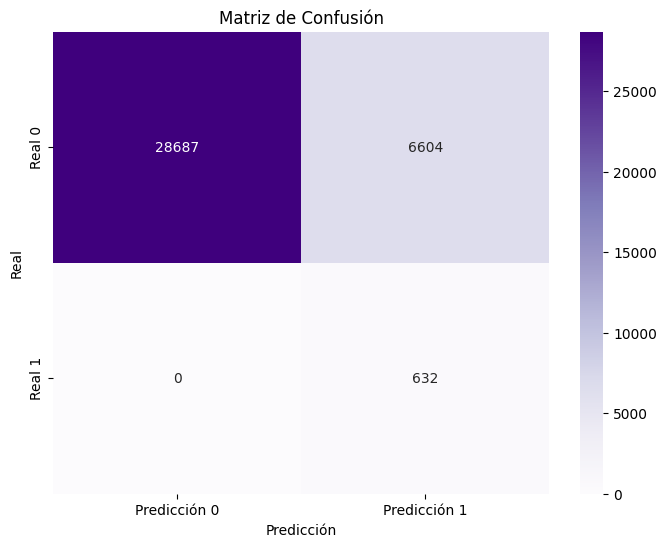

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     35291
           1       0.09      1.00      0.16       632

    accuracy                           0.82     35923
   macro avg       0.54      0.91      0.53     35923
weighted avg       0.98      0.82      0.88     35923



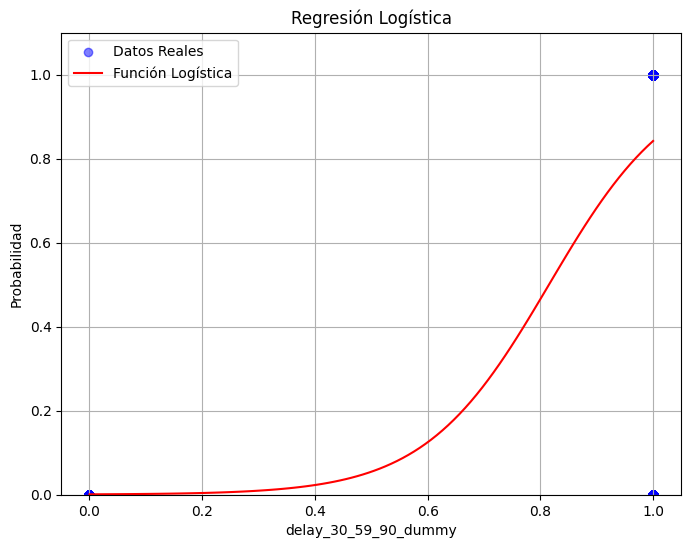

In [83]:
#REGRESION LOGISTICA delay_30_59_90_dummy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['delay_30_59_90_dummy']]  # Variable predictora
y = df['default_flag']  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]
print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, zero_division=1)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= 'Purples', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)


# Puntos de la recta para graficar la función logística
x = np.linspace(0, df['delay_30_59_90_dummy'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Reales', alpha=0.5)
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('delay_30_59_90_dummy')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

Coeficiente w: 8.711994220721047
Intercepto b: -4.88412420330833
Precisión: 0.81
Confusion Matrix:
[[28709  6582]
 [   66   566]]


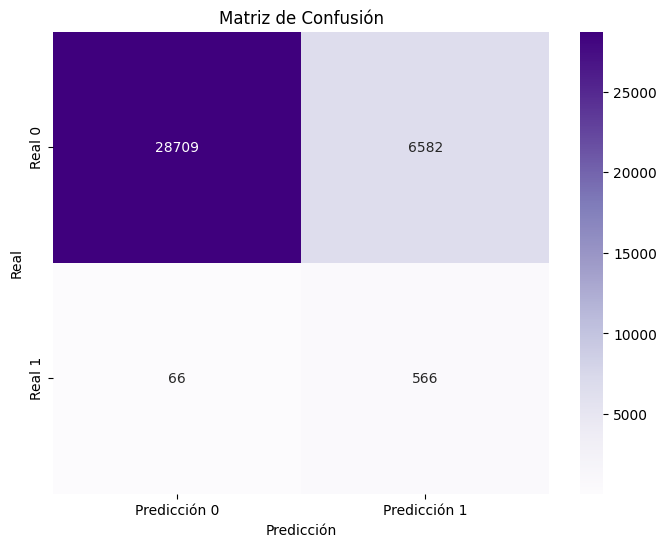

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     35291
           1       0.08      0.90      0.15       632

    accuracy                           0.81     35923
   macro avg       0.54      0.85      0.52     35923
weighted avg       0.98      0.81      0.88     35923



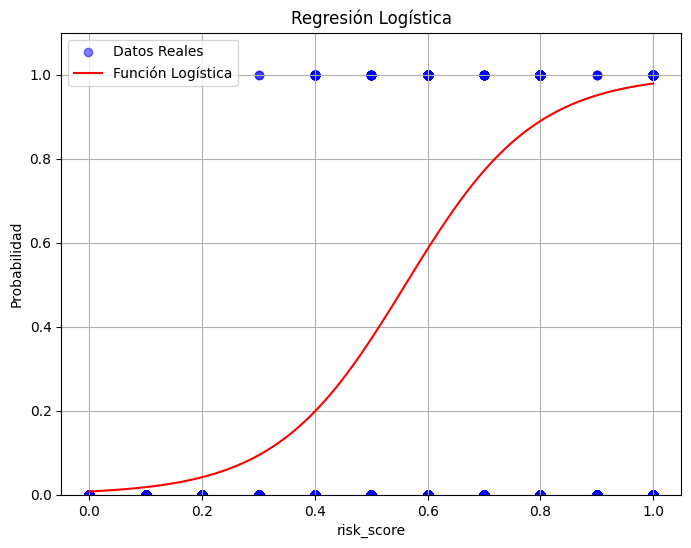

In [85]:
#REGRESION LOGISTICA risk_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/Data_Consolidado.csv')

# Definir la variable predictora (X) y la variable objetivo (y)
X = df[['risk_score']]  # Variable predictora
y = df['default_flag']  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]
print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, zero_division=1)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= 'Purples', xticklabels=['Predicción 0', 'Predicción 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)


# Puntos de la recta para graficar la función logística
x = np.linspace(0, df['risk_score'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Reales', alpha=0.5)
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('risk_score')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()